<font size = 8> Eigenvectors and Eigenvalues

***

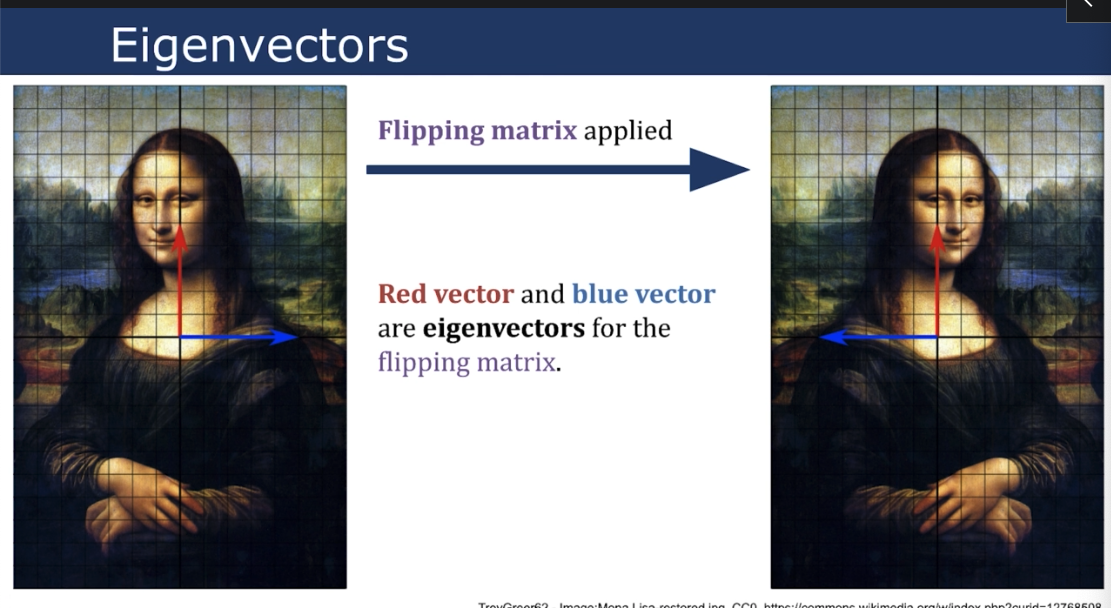

In [1]:
# both red and blue vectors are eigenvectors

# the retain their relationship

# vector span is the same

# flipping matrix

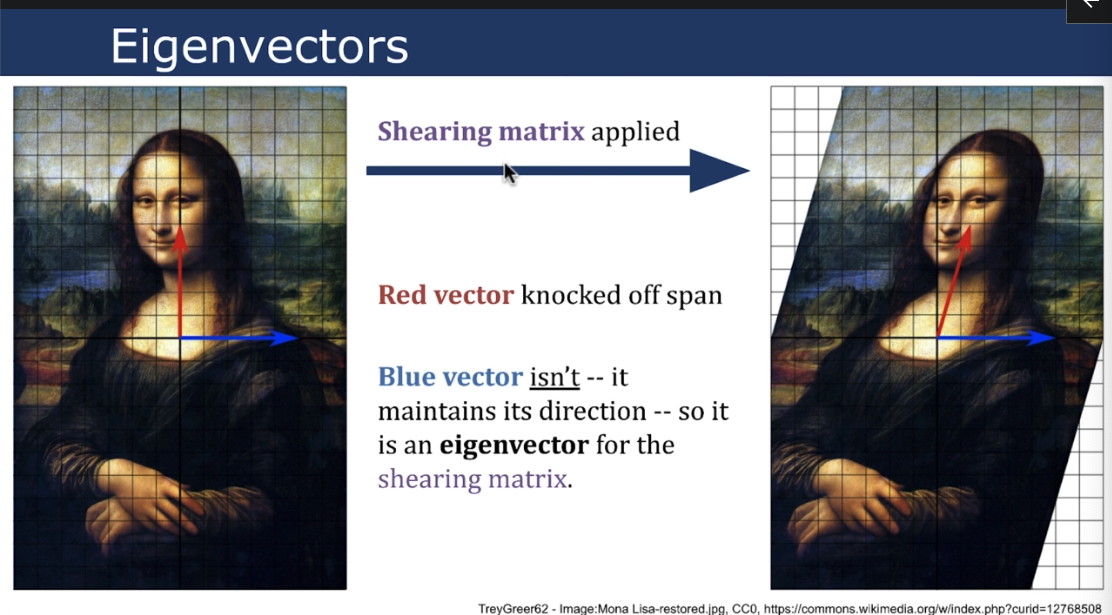

In [2]:
# when applying a shearing matrix, the painting maintains its size, but shifted

In [3]:
# red is no longer eigenvector

In [4]:
# blue is still a eigenvector

***

In [5]:
# eigenvalues

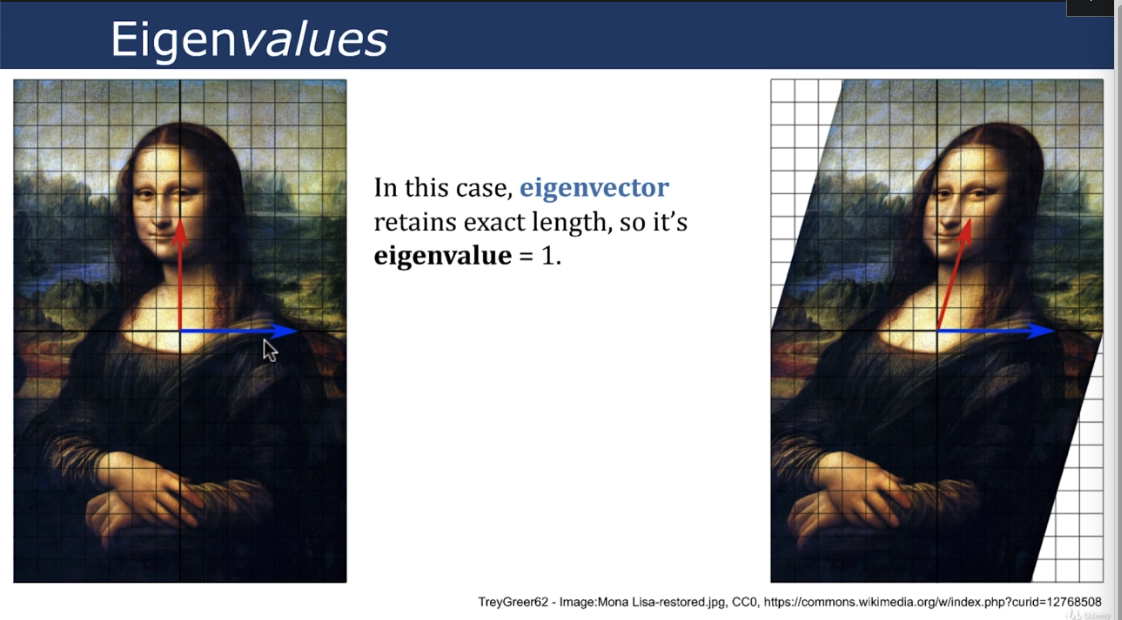

In [6]:
# ysed ti determine the length of the eigenvector

# before and after the shearing matrix is applied

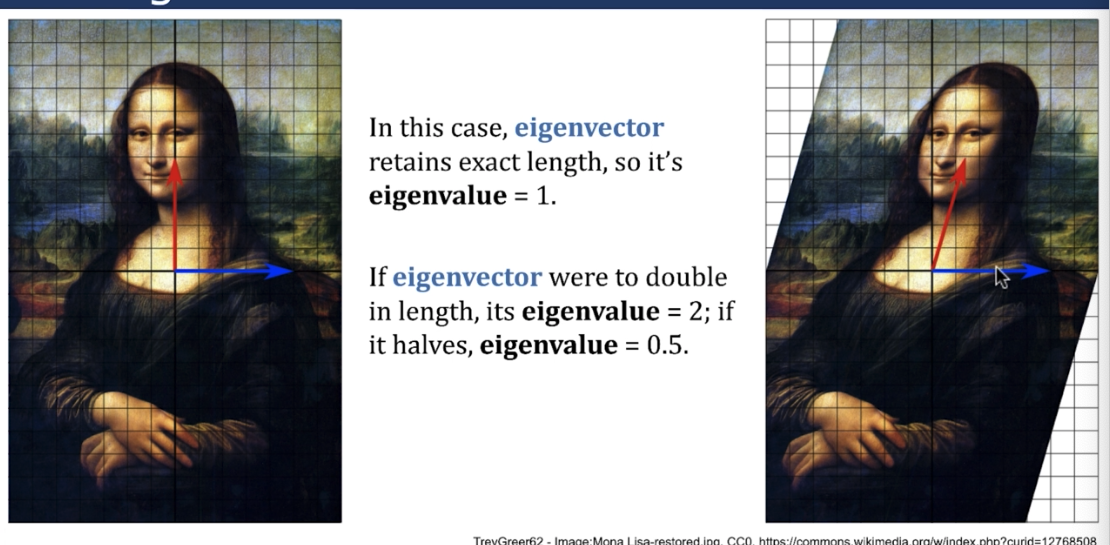

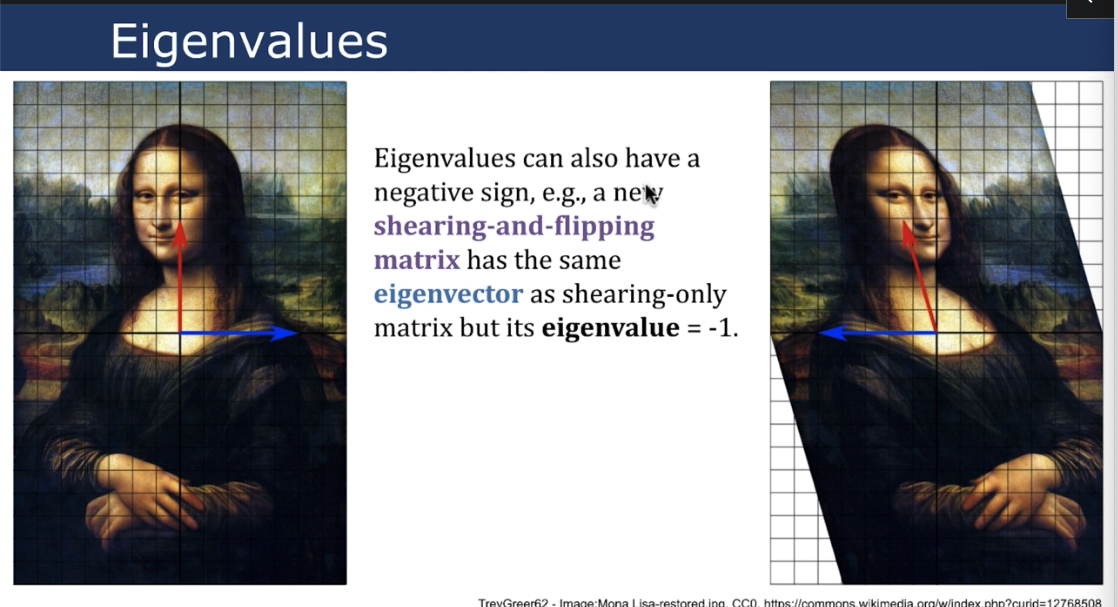

In [7]:
# eignvalues can also have a negative sign

In [8]:
# above is an example of both flipping and shearing transformation

In [9]:
# for blue the eigenvector is the same, but eigenvalue is -1

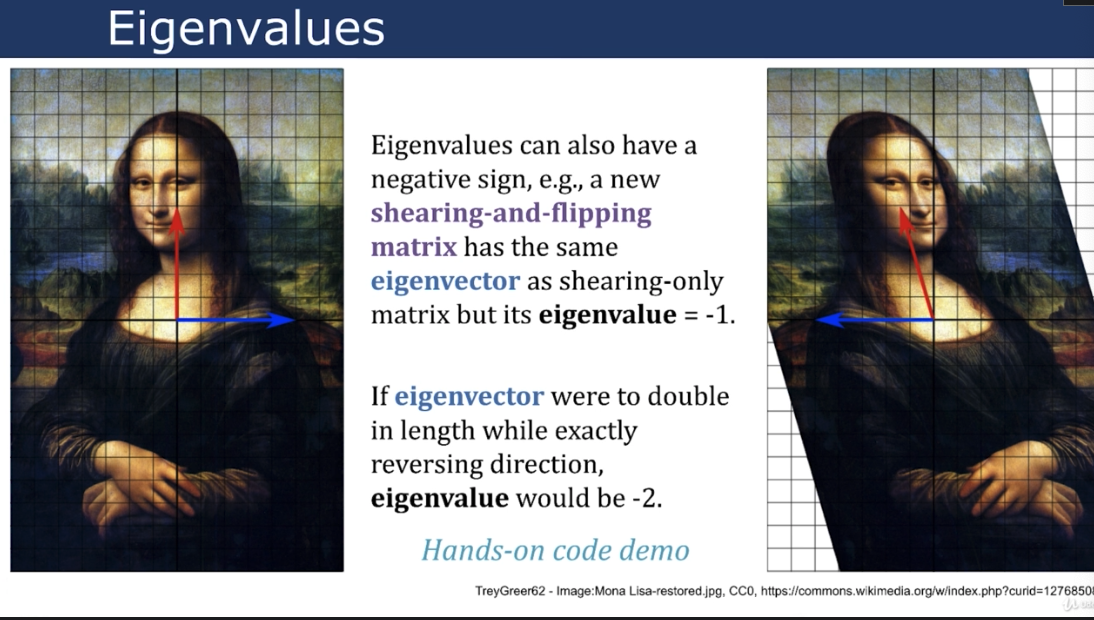

***

***

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [11]:
# exact same direction or exact opposite direction

Easiest way to understand this is to work through an example: 

In [4]:
import numpy as np

In [5]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [6]:
v = np.array([3, 1])
v

array([3, 1])

In [7]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [15]:
# a vector of eigenvalues

# a matrix of eigenvectors

In [18]:
lambdas, V = np.linalg.eig(A)

In [17]:
# lambdas -- stores eigenvalues (vector)

# V -- matrix of eigenvectors

In [19]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

The matrix contains as many eigenvectors as there are columns of A: 

In [20]:
# each column is a separate eigenvector for V

In [21]:
# eigenvector 1

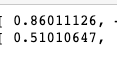

In [22]:
# eigenvector 2

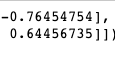

With a corresponding eigenvalue for each eigenvector:

In [27]:
lambdas

array([ 1.37228132, -4.37228132])

In [25]:
# so, 1.37 corresponds to eigenvector .86, .51)

***

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [28]:
# take the first column of V

v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [29]:
# then take first value

lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [30]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [31]:
lambduh * v

array([1.18031462, 0.70000958])

In [32]:
# we get the same value

***

In [38]:
import matplotlib.pyplot as plt

In [39]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

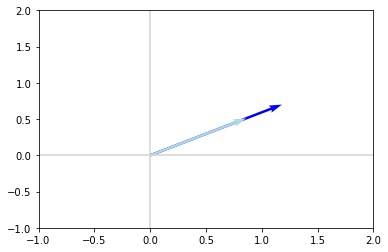

In [38]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [39]:
# original eigenvector (llight blue)

In [40]:
# after transformation -- just longer

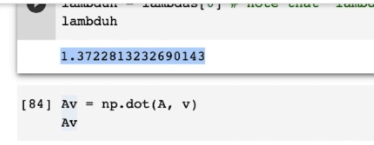

In [41]:
# the amount of lengthen, is exactly teh eigenvalue for the eigenvector

***

And again for the second eigenvector of A: 

In [42]:
# take second column of matrix V

v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [44]:
# not get the seocnd eigenvalue

lambda2 = lambdas[1]
lambda2

-4.372281323269014

***

Let's confirm that $Av = \lambda v$ for the second eigenvector: 

In [45]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [46]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

In [47]:
# equation is satisfied

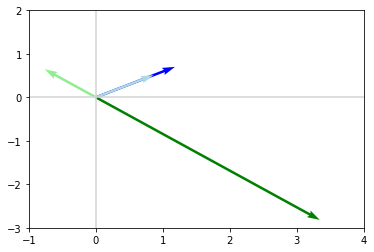

In [48]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

In [49]:
# lightgreen - origin

# scond -- dark green -- transofms the origin to -4.4 times

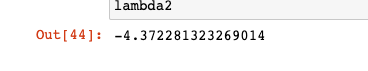

# PyTorch

In [14]:
A

array([[-1,  4],
       [ 2, -2]])

In [15]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [10]:
eigens = torch.eig(A_p, eigenvectors=True)

/var/folders/hb/f2vn4dyn2_n5b7z6g7g6zwx00000gn/T/ipykernel_32830/2611061173.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:3427.)
  eigens = torch.eig(A_p, eigenvectors=True)


In [16]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) 

# outputs complex numbers because real matrices can have complex eigenvectors

In [12]:
# unlike numpy, Pytorch does not automatically output eigenvalues

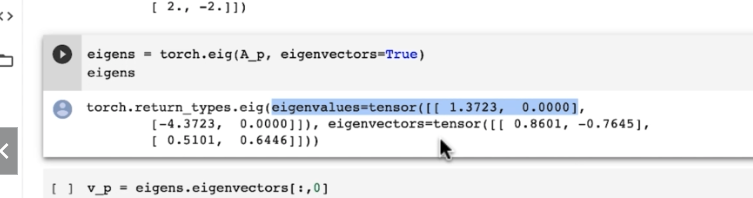

In [13]:
# the steps were in the previous version of numpy 

In [17]:
V_cplx 

# complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [18]:
V_p = V_cplx.float()
V_p

/var/folders/hb/f2vn4dyn2_n5b7z6g7g6zwx00000gn/T/ipykernel_32830/1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:250.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [19]:
# this is the matrix of engenvectors

In [20]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [21]:
# get first column

***

In [22]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [23]:
# this is the vector of eigenvalues

****

In [25]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [26]:
# now get first value

lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

***

In [27]:
# compare products

In [28]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [29]:
lambda_p * v_p

tensor([1.1803, 0.7000])

***

In [30]:
# now do this for the second vector

In [31]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [32]:
# and the second value

lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [33]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [34]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

***

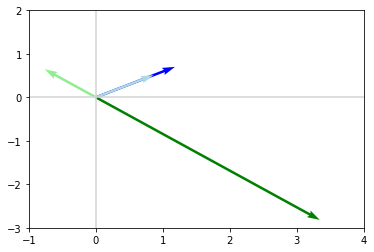

In [40]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

***

# Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows): 

In [41]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [42]:
lambdas_X, V_X = np.linalg.eig(X) 

In [45]:
V_X

# this is the matrix of eigenvectors

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [46]:
lambdas_X

# this is the vector of eigenvalues

array([29.67623202, 20.62117365, -0.29740567])

In [47]:
# NOTE THE VECTORS HERE ARE COLUMN

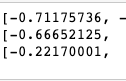

Confirm $Xv = \lambda v$ for an example eigenvector: 

In [48]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [49]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [50]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [51]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

## PyTorch

In [1]:
import torch

***

In [2]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])

In [3]:
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [4]:
X_pt.shape

torch.Size([3, 2])

***

## TensorFlow

In [5]:
import tensorflow as tf

In [7]:
x_tf = tf.Variable([25,2,5])

In [8]:
y_tf = tf.Variable([0,1,2])

***

In [7]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])

In [8]:
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [10]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

***

### Matplotlib

In [9]:
import matplotlib.pyplot as plt